# Explore here

It's recommended to use this notebook for exploration purposes.

In [3]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re


In [ ]:
resource_url = "https://es.wikipedia.org/wiki/Anexo:Pel%C3%ADculas_con_las_mayores_recaudaciones"
response = requests.get(resource_url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    tax_table = pd.read_html(resource_url)
    df = tax_table[0]
    df = df.dropna()
    df['Presupuesto'] = df['Presupuesto'].str.replace(' ', '', regex=False)

print(tax_table[0].columns)
print(tax_table[0])
print(f'Las tablas son: {len(tax_table)}')
print(df)


Index(['N.º', 'Película', 'Recaudación mundial', 'Taquilla (en EE. UU.)',
       'Taquilla (fuera de EE. UU.)', 'Presupuesto', 'Distribuidora(s)',
       'Año de estreno'],
      dtype='object')
    N.º                                 Película Recaudación mundial  \
0     1                                   Avatar       2 923 706 026   
1     2                        Avengers: Endgame       2 799 439 100   
2     3                 Avatar: The Way of Water       2 320 251 738   
3     4                                  Titanic       2 264 743 305   
4     5                                 Ne Zha 2       2 092 780 312   
..  ...                                      ...                 ...   
95   96          Guardianes de la Galaxia vol. 3         845 555 777   
96   97                                Inception         839 030 630   
97   98  Transformers: la venganza de los caídos         836 303 693   
98   99                               Spider-Man         825 025 036   
99  100      

In [3]:
conexion = sqlite3.connect('peliculas_taquilleras.db')
cursor = conexion.cursor()

df.to_sql('peliculas', conexion, if_exists='replace', index = False)
conexion. commit()
conexion.close()


In [4]:
conexion = sqlite3.connect('peliculas_taquilleras.db')
cursor = conexion.cursor()

cursor.execute('''
    SELECT "Película" FROM peliculas
''')
resultados = cursor.fetchall()
for fila in resultados:
    print(fila)

cursor.execute('''
    SELECT "Película","Presupuesto" FROM peliculas WHERE "Presupuesto" > 400000000
''')
resultados = cursor.fetchall()
for fila in resultados:
    print(fila)

cursor.execute('''
    SELECT "Película","Año de estreno" FROM peliculas WHERE "Año de estreno" < 2000
''')
resultados = cursor.fetchall()
for fila in resultados:
    print(fila)

conexion.close()


('Avatar',)
('Avengers: Endgame',)
('Avatar: The Way of Water',)
('Titanic',)
('Ne Zha 2',)
('Star Wars: Episodio VII - El despertar de la Fuerza',)
('Avengers: Infinity War',)
('Spider-Man: No Way Home',)
('Inside Out 2',)
('Jurassic World',)
('El rey león',)
('The Avengers',)
('Furious 7',)
('Top Gun: Maverick',)
('Frozen II',)
('Barbie',)
('Avengers: Age of Ultron',)
('Super Mario Bros.: la película',)
('Black Panther',)
('Harry Potter y las reliquias de la Muerte: parte 2',)
('Deadpool & Wolverine',)
('Star Wars: Episodio VIII - Los últimos Jedi',)
('Jurassic World: el reino caído',)
('Frozen',)
('La bella y la bestia',)
('Los Increíbles 2',)
('The Fate of the Furious',)
('Iron Man 3',)
('Minions',)
('El Señor de los Anillos: el retorno del Rey',)
('Capitán América: Civil War',)
('Aquaman',)
('Skyfall',)
('Spider-Man: lejos de casa',)
('Capitana Marvel',)
('Transformers: el lado oscuro de la luna',)
('The Dark Knight Rises',)
('Parque Jurásico',)
('Transformers: la era de la extinc

In [5]:
conexion = sqlite3.connect('peliculas_taquilleras.db')
df = pd.read_sql_query("SELECT * FROM peliculas", conexion)
df['Presupuesto'] = df['Presupuesto'].str.replace(' ', '', regex=False)
print(df['Presupuesto'])
conexion.close()


0     246 000 000
1     400 000 000
2     356 000 000
3     200 000 000
4      80 000 000
         ...     
95    250 000 000
96    160 000 000
97    200 000 000
98    140 000 000
99    149 000 000
Name: Presupuesto, Length: 100, dtype: object


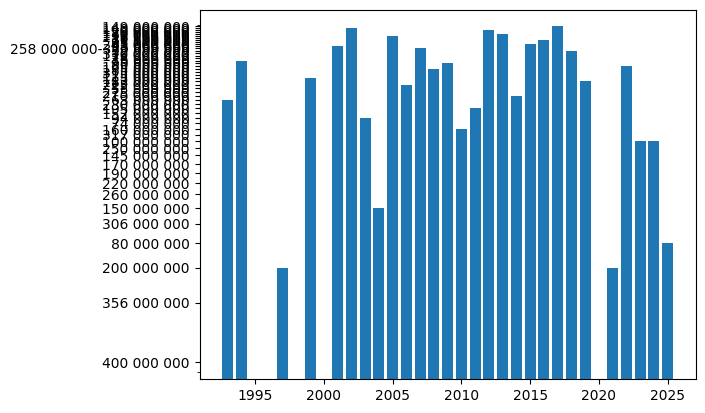

In [ ]:
x = df["Año de estreno"]
y = df["Presupuesto"]

plt.yscale('log')
plt.bar(x, y)
plt.show()

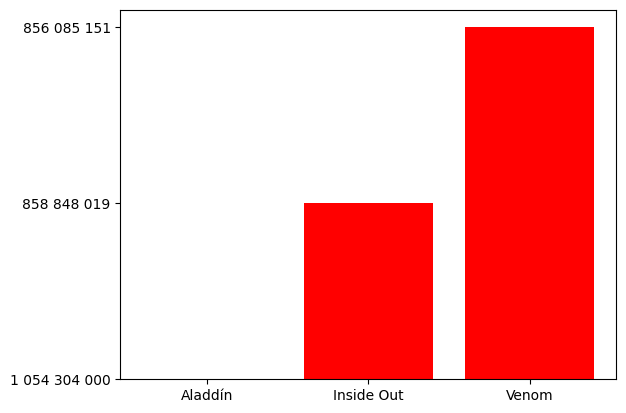

In [7]:
peliculas_comparar = ['Venom', 'Inside Out', 'Aladdín']

df_peliculas_comparar = df[df['Película'].isin(peliculas_comparar)]

x = df_peliculas_comparar["Película"]
y = df_peliculas_comparar["Recaudación mundial"]


plt.bar(x, y, color = "Red")
plt.show()


### EJEMPLO 2 - Scraping 

In [12]:
data = list()
resource_url = "https://www.planetadelibros.com/libros-mas-vendidos"
response = requests.get(resource_url)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    pattern_tittle = r'Libro_libro_\S+'
    tittles = soup.find_all('p', class_= re.compile(pattern_tittle))

for tittle in tittles:
    tittle = tittle.find('span').get_text()
    print(tittle)


Por si un día volvemos
El plan maestro
El Señor de los Anillos. Edición ilustrada por el autor
Las que no duermen NASH
Señoras bien
La Toffana
Te receto un gato
Victoria
Las fuerzas contrarias
El espía
Hábitos atómicos
La Supraconciencia existe
Recupera tu mente, reconquista tu vida
Cómo hacer que te pasen cosas buenas
Murdle: Resuelve el crimen
545 recetas para triunfar
Pirómanas
Historias de Gaza
Recuérdame bailando
Sueña, visualiza, crea
El Rulas 4. El Rulas atrapado en el mundo gamer
Las Ratitas 13. Detectives por un día
Atrapados en el parque de atracciones maldito
Magic Animals 1. El poder del amuleto
Destroza este diario. Ahora a todo color
Anna Kadabra 1. El Club de la Luna Llena
Los Compacuentos 2. Los Compas y el frijolito mágico
Las aventuras de Dani y Evan 11. El ataque del supercroc
El libro prohibido de Exe
Los misterios de los Polo 4. El tesoro samurái
Acelerando en rojo
Alas de ónix (Empíreo 3)
Nuestro lugar en el mundo (edición especial)
Alas de sangre (Empíreo 1) Edic

In [10]:
pattern_author = r'LibroAutores_autoresList__\S+'

authors = soup.find_all('ul', class_= re.compile(pattern_author))
for author in authors:
    author = author.find('a').get_text()
    print(author)


María Dueñas
Javier Sierra
J. R. R. Tolkien
Dolores Redondo
Pilar Eyre
Vanessa Montfort
Syou Ishida
Paloma Sánchez-Garnica
Lorenzo Silva
Jorge Díaz
James Clear
Dr. Manuel Sans Segarra
Marian Rojas Estapé
Marian Rojas Estapé
G. T. Karber
Karlos Arguiñano
Noemí Casquet
Mikel Ayestaran
Mara Torres
Curro Cañete
Animalize21
Las Ratitas
Iker Unzu
Susanna Isern
Keri Smith
Pedro Mañas
Mikecrack, El Trollino y Timba Vk
Las aventuras de Dani y Evan
Mikecrack
Los Polo
Iryna Zubkova. ir_zu
Rebecca Yarros
Inma Rubiales
Rebecca Yarros
Ana Huang
Sarah J. Maas
Blue Jeans
Nerea Pascual
Pol Gise
Holly Jackson
Sonsoles Ónega
Inma Rubiales
Ana Ibáñez
Morgan Housel
Agatha Christie
Colleen Hoover
Megan Maxwell
Alice Kellen
Fernando Aramburu
Carme Chaparro
María Dueñas
Boticaria García
Lorenzo Silva
Paloma Sánchez-Garnica
Rebecca Yarros
Dolores Redondo
Dr. Manuel Sans Segarra
Myriam M. Lejardi
Rebecca Yarros
Paloma Sánchez-Garnica
María Dueñas
Paloma Sánchez-Garnica
Megan Maxwell
Paloma Sánchez-Garnica
Loren

AttributeError: 'NoneType' object has no attribute 'get_text'

In [11]:
pattern_type_book = r'LibroTematicaPrincipal_tematicaPrincipal__\S+'

types_list = soup.find_all('div', class_= re.compile(pattern_type_book))

if types_list:
  for type_div in types_list:
    type_a = type_div.find('a')
    if type_a:
        type_book = type_a.get_text()
    print(type_book)

Novela contemporánea
Novela contemporánea
Fantasía
Novela negra
Novela contemporánea
Novela histórica
Novela contemporánea
Novela contemporánea
Novela negra
Novela negra
Autoayuda
Ciencia
Autoayuda
Autoayuda
Ocio y entretenimiento
Cocina
Ciencias humanas y sociales
Actualidad
Salud
Autoayuda
Infantil
Infantil
Infantil
Infantil
Ocio y entretenimiento
Infantil
Infantil
Infantil
Infantil
Infantil
Juvenil
Juvenil
Juvenil
Juvenil
Juvenil
Juvenil
Juvenil
Juvenil
Juvenil
Juvenil
Novela histórica
Juvenil
Ciencia
Economía
Teatro
Novela contemporánea
Novela romántica
Novela contemporánea
Novela contemporánea
Novela negra
Novela contemporánea
Salud
Novela negra
Novela contemporánea
Juvenil
Novela negra
Ciencia
Juvenil
Juvenil
Novela contemporánea
Novela contemporánea
Novela contemporánea
Novela romántica
Novela contemporánea
Novela negra
Novela romántica
Autoayuda
Juvenil
Juvenil
Novela contemporánea
Manga
Manga
Manga
Manga
Manga
Manga
Manga
Manga
Manga
Cómic
Fantasía
Fantasía
Novela contemporáne

In [18]:
data.append((tittle, author, type_book))
df = pd.DataFrame(data = data, columns = ['Titulo', 'Autor', 'Tipo_de_libro'])
print(df)

                            Titulo            Autor  \
0  El día que dejé de comprar ropa  [[[Yuto Sano]]]   
1  El día que dejé de comprar ropa  [[[Yuto Sano]]]   
2  El día que dejé de comprar ropa  [[[Yuto Sano]]]   
3  El día que dejé de comprar ropa  [[[Yuto Sano]]]   
4  El día que dejé de comprar ropa  [[[Yuto Sano]]]   

                 Tipo_de_libro  
0  Ciencias humanas y sociales  
1  Ciencias humanas y sociales  
2  Ciencias humanas y sociales  
3  Ciencias humanas y sociales  
4  Ciencias humanas y sociales  


In [ ]:
frec_type_book = df['tipo_de_libro'].value_counts()
df_frecuencia = frec_edad.reset_index()
df_frecuencia.columns = ['edad', 'frecuencia']